In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('Ecommerce Customers')

In [16]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [18]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA:->

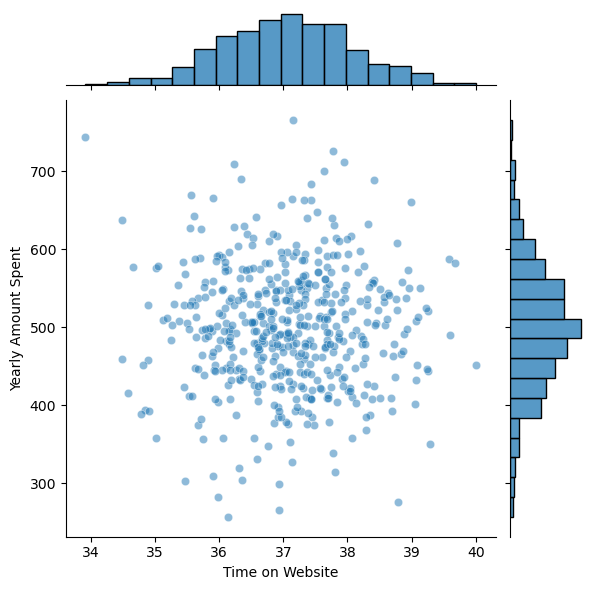

In [25]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent',alpha=0.5)

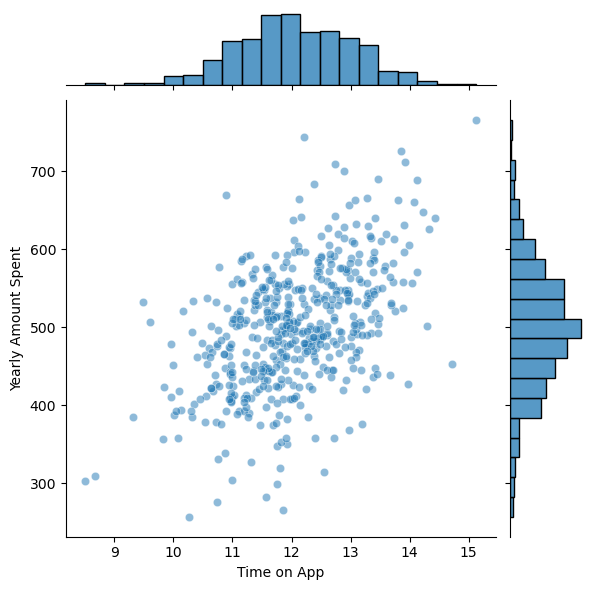

In [26]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',alpha=0.5)

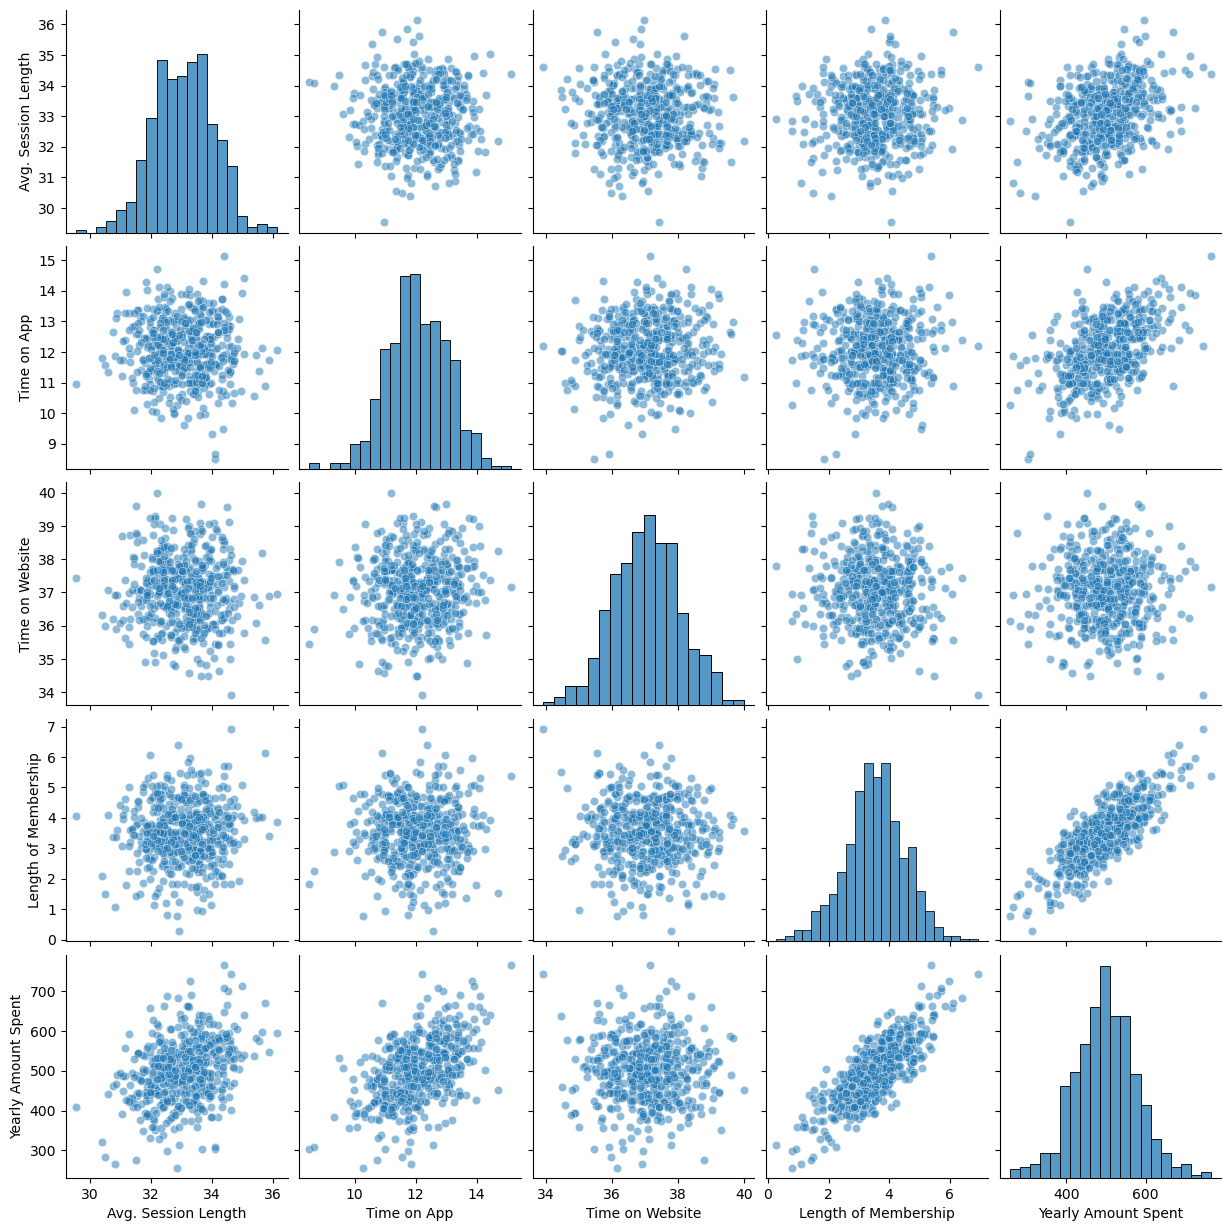

In [28]:
sns.pairplot(data=df,kind='scatter',plot_kws={'alpha':0.5})

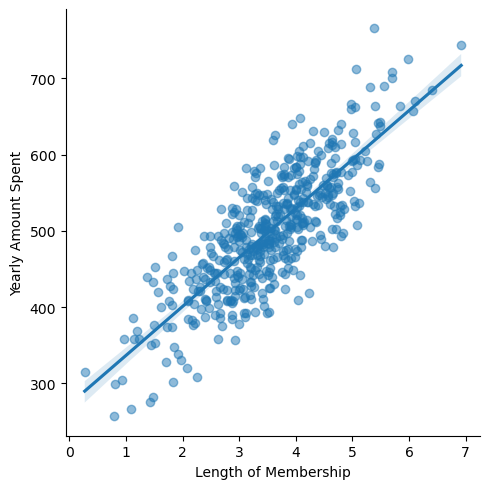

In [31]:
sns.lmplot(data=df,x='Length of Membership',y='Yearly Amount Spent',scatter_kws={'alpha':0.5})

## Applying Linear Regression

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df[['Yearly Amount Spent']]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
lr.coef_

array([[25.72347708, 38.8956999 ,  0.49605175, 61.43864364]])

### ->Prediction

In [42]:
predictions=lr.predict(x_test)

In [43]:
predictions

array([[434.96225414],
       [507.70869316],
       [500.58690544],
       [493.81010305],
       [254.86035269],
       [506.71526157],
       [380.33508136],
       [573.85765754],
       [483.96468798],
       [604.62885949],
       [500.25521067],
       [411.15186562],
       [365.80365452],
       [584.13538163],
       [475.68262707],
       [553.87820904],
       [564.79090009],
       [535.23975901],
       [441.75776364],
       [538.1266335 ],
       [418.9858832 ],
       [511.55498889],
       [550.83911907],
       [531.47153611],
       [766.23275456],
       [450.728632  ],
       [457.30327494],
       [548.86959251],
       [413.40738165],
       [534.77748893],
       [515.91245524],
       [538.37390237],
       [693.00059493],
       [563.72599766],
       [456.9668767 ],
       [424.96603491],
       [380.38421235],
       [331.75311916],
       [456.30945586],
       [283.49619629],
       [532.02094778],
       [703.15682619],
       [487.6515882 ],
       [526

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
print('mean absolute erroe:',mean_absolute_error(y_test,predictions))
print('mean squared erroe:',mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

mean absolute erroe: 7.182689233710786
mean squared erroe: 81.22618909322343
RMSE: 9.012557300412764


### -> Residuals

In [52]:
residuals=y_test-predictions

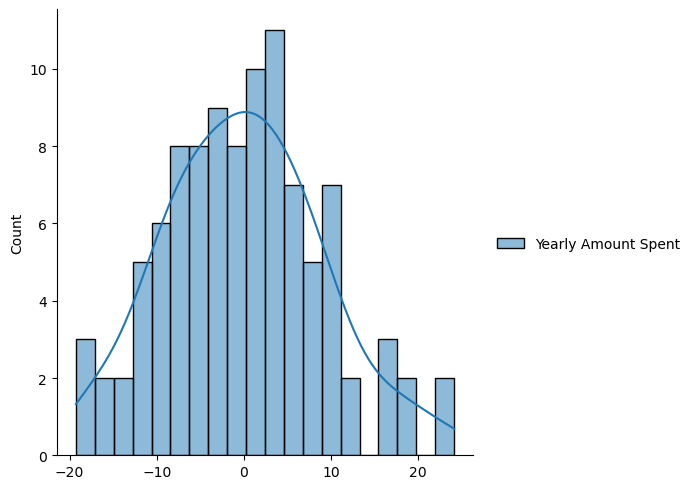

In [53]:
sns.displot(residuals,bins=20,kde=True)